# Random Forest Classification

In [17]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

# Running Model with different Features

## NMI 0.15 with Common Features 

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Female\GeneCpG\Xtras\Top50_eachFeats
df = pd.read_csv('NMI_Methylome_Female15_Data.csv')
df['APPRDX'] = df['APPRDX'] -1
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Female\GeneCpG\Xtras\Top50_eachFeats
(150, 64)


,PATNO,APPRDX,cg15487922,cg05702234,cg24441068,cg20699097,cg14245173,cg12130295,cg12162792,cg25537999,...,cg04550367,cg18765724,cg26405759,cg17080573,cg22011888,cg26115667,cg01219777,cg25588592,cg27094323,cg16537985
0,3000,1,0.787071,0.886493,0.009892,0.561816,0.037158,0.917261,0.855302,0.927314,...,0.908233,0.926035,0.910940,0.637042,0.889954,0.747158,0.849757,0.879274,0.104415,0.683303
1,3002,0,0.771991,0.891774,0.010496,0.522515,0.030703,0.920615,0.887998,0.864310,...,0.890952,0.862585,0.918484,0.642083,0.882415,0.702583,0.833641,0.885489,0.316684,0.865309


In [3]:
df2 = pd.read_csv('Any2Common_inAll45Feats_Data_Female.csv')
print(df2.shape)
df2.head(2)

(84, 6)


,PATNO,MDSP_Constipate,MDSP_Pain,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,3002,1,1,0,1,2
1,3020,0,1,0,1,1


In [4]:
df1 = pd.merge(df, df2, on = 'PATNO', how='inner')
df1 = df1.drop(['PATNO'], axis=1)
dff1 = df1
print(df1.shape)
df1.head(2)

(50, 68)


,APPRDX,cg15487922,cg05702234,cg24441068,cg20699097,cg14245173,cg12130295,cg12162792,cg25537999,cg21605784,...,cg26115667,cg01219777,cg25588592,cg27094323,cg16537985,MDSP_Constipate,MDSP_Pain,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,0,0.771991,0.891774,0.010496,0.522515,0.030703,0.920615,0.887998,0.864310,0.921895,...,0.702583,0.833641,0.885489,0.316684,0.865309,1,1,0,1,2
1,1,0.787123,0.857112,0.010375,0.491913,0.039266,0.907291,0.817082,0.914858,0.928419,...,0.654270,0.779952,0.923710,0.075527,0.784425,0,1,0,0,0


In [5]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(15))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7333333333333333
2
Mean accuracy: 0.8333333333333334
3
Mean accuracy: 0.7666666666666666
4
Mean accuracy: 0.7333333333333334
5
Mean accuracy: 0.8333333333333333
6
Mean accuracy: 0.8
7
Mean accuracy: 0.7333333333333334
8
Mean accuracy: 0.7666666666666667
9
Mean accuracy: 0.6666666666666666
10
Mean accuracy: 0.7333333333333333
11
Mean accuracy: 0.7999999999999999
12
Mean accuracy: 0.7666666666666666
13
Mean accuracy: 0.8
14
Mean accuracy: 0.7666666666666667
15
Mean accuracy: 0.8999999999999998
16
Mean accuracy: 0.8333333333333333
17
Mean accuracy: 0.8
18
Mean accuracy: 0.7
19
Mean accuracy: 0.8666666666666668
20
Mean accuracy: 0.7
21
Mean accuracy: 0.7333333333333333
22
Mean accuracy: 0.8
23
Mean accuracy: 0.7
24
Mean accuracy: 0.7666666666666667
25
Mean accuracy: 0.7
26
Mean accuracy: 0.7333333333333334
27
Mean accuracy: 0.7333333333333334
28
Mean accuracy: 0.7
29
Mean accuracy: 0.7666666666666666
30
Mean accuracy: 0.7666666666666666
31
Mean accuracy: 0.73333333333333

In [6]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI_Methylome_Female15withFeats_100RF.csv", index=False)

0.7496666666666667


## NMI 0.13 with Common Features 

In [7]:
df = pd.read_csv('NMI_Methylome_Female13_Data.csv')
df['APPRDX'] = df['APPRDX'] -1
df2 = pd.read_csv('Any2Common_inAll45Feats_Data_Female.csv')
df1 = pd.merge(df, df2, on = 'PATNO', how='inner')
df1 = df1.drop(['PATNO'], axis=1)
dff2 = df1
print(df1.shape)
df1.head(2)

(50, 338)


,APPRDX,cg15487922,cg05702234,cg24441068,cg20699097,cg14245173,cg12130295,cg12162792,cg25537999,cg21605784,...,cg25562059,cg16123908,cg23060256,cg16670864,cg02294563,MDSP_Constipate,MDSP_Pain,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,0,0.771991,0.891774,0.010496,0.522515,0.030703,0.920615,0.887998,0.864310,0.921895,...,0.76651,0.899257,0.855902,0.064308,0.434085,1,1,0,1,2
1,1,0.787123,0.857112,0.010375,0.491913,0.039266,0.907291,0.817082,0.914858,0.928419,...,0.80878,0.921107,0.827401,0.086812,0.377451,0,1,0,0,0


In [8]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(15))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7666666666666666
2
Mean accuracy: 0.8
3
Mean accuracy: 0.8333333333333333
4
Mean accuracy: 0.7666666666666667
5
Mean accuracy: 0.8
6
Mean accuracy: 0.8
7
Mean accuracy: 0.7333333333333333
8
Mean accuracy: 0.7
9
Mean accuracy: 0.7
10
Mean accuracy: 0.8333333333333333
11
Mean accuracy: 0.7333333333333333
12
Mean accuracy: 0.7999999999999999
13
Mean accuracy: 0.7666666666666666
14
Mean accuracy: 0.7666666666666666
15
Mean accuracy: 0.7666666666666667
16
Mean accuracy: 0.8
17
Mean accuracy: 0.8
18
Mean accuracy: 0.8
19
Mean accuracy: 0.9
20
Mean accuracy: 0.7666666666666667
21
Mean accuracy: 0.7333333333333333
22
Mean accuracy: 0.8
23
Mean accuracy: 0.7666666666666667
24
Mean accuracy: 0.6666666666666666
25
Mean accuracy: 0.7333333333333333
26
Mean accuracy: 0.8
27
Mean accuracy: 0.6333333333333333
28
Mean accuracy: 0.7
29
Mean accuracy: 0.7333333333333333
30
Mean accuracy: 0.7999999999999999
31
Mean accuracy: 0.7999999999999999
32
Mean accuracy: 0.7666666666666667
33
Me

In [9]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI_Methylome_Female13withFeats_100RF.csv")

0.7556666666666666


## NMI 0.12 with Common Features 

In [10]:
df = pd.read_csv('NMI_Methylome_Female12_Data.csv')
df['APPRDX'] = df['APPRDX'] -1
df2 = pd.read_csv('Any2Common_inAll45Feats_Data_Female.csv')
df1 = pd.merge(df, df2, on = 'PATNO', how='inner')
df1 = df1.drop(['PATNO'], axis=1)
dff3 = df1
print(df1.shape)
df1.head(2)

(50, 734)


,APPRDX,cg15487922,cg05702234,cg24441068,cg20699097,cg14245173,cg12130295,cg12162792,cg25537999,cg21605784,...,cg19755272,cg02746620,cg11541225,cg22020954,cg24822602,MDSP_Constipate,MDSP_Pain,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,0,0.771991,0.891774,0.010496,0.522515,0.030703,0.920615,0.887998,0.864310,0.921895,...,0.892314,0.884273,0.861410,0.910162,0.931325,1,1,0,1,2
1,1,0.787123,0.857112,0.010375,0.491913,0.039266,0.907291,0.817082,0.914858,0.928419,...,0.841455,0.833618,0.747135,0.904781,0.894503,0,1,0,0,0


In [11]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(15))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7333333333333333
2
Mean accuracy: 0.8
3
Mean accuracy: 0.8
4
Mean accuracy: 0.7333333333333334
5
Mean accuracy: 0.8333333333333333
6
Mean accuracy: 0.7
7
Mean accuracy: 0.7333333333333333
8
Mean accuracy: 0.7666666666666667
9
Mean accuracy: 0.7333333333333333
10
Mean accuracy: 0.7666666666666666
11
Mean accuracy: 0.8333333333333334
12
Mean accuracy: 0.8333333333333333
13
Mean accuracy: 0.8333333333333333
14
Mean accuracy: 0.8
15
Mean accuracy: 0.8
16
Mean accuracy: 0.7666666666666667
17
Mean accuracy: 0.8
18
Mean accuracy: 0.7666666666666666
19
Mean accuracy: 0.9333333333333332
20
Mean accuracy: 0.8333333333333333
21
Mean accuracy: 0.7333333333333333
22
Mean accuracy: 0.8
23
Mean accuracy: 0.8
24
Mean accuracy: 0.7666666666666667
25
Mean accuracy: 0.8
26
Mean accuracy: 0.8
27
Mean accuracy: 0.7999999999999999
28
Mean accuracy: 0.7
29
Mean accuracy: 0.7
30
Mean accuracy: 0.8333333333333333
31
Mean accuracy: 0.8333333333333334
32
Mean accuracy: 0.7666666666666667
33
Me

In [12]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI_Methylome_Female12withFeats_100RF.csv")

0.7689999999999997


## Merged Top 50 CpGs with Common Features 

In [13]:
df = pd.read_csv('All5_Top50sCpG_Female.csv')
df['APPRDX'] = df['APPRDX'] -1
df2 = pd.read_csv('Any2Common_inAll45Feats_Data_Female.csv')
df1 = pd.merge(df, df2, on = 'PATNO', how='inner')
df1 = df1.drop(['PATNO'], axis=1)
dff4 = df1
print(df1.shape)
df1.head(2)

(50, 234)


,APPRDX,cg11668199,cg04983473,cg25943702,cg01620849,cg22210403,cg21241862,cg19030090,cg02232418,cg18757169,...,cg12751142,cg17957325,cg13520090,cg05538980,cg18580385,MDSP_Constipate,MDSP_Pain,Montreal_Cognitive,SCOPA_Gastro,UPSIT
0,0,0.045694,0.924158,0.908038,0.033501,0.071470,0.904030,0.917645,0.830685,0.506640,...,0.510861,0.922070,0.877443,0.792984,0.895246,1,1,0,1,2
1,0,0.051780,0.926387,0.903103,0.036469,0.075405,0.893949,0.906068,0.717058,0.507031,...,0.587119,0.899322,0.804907,0.745703,0.848793,0,1,0,1,1


In [14]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(15))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8
2
Mean accuracy: 0.8333333333333334
3
Mean accuracy: 0.8
4
Mean accuracy: 0.7666666666666666
5
Mean accuracy: 0.7333333333333334
6
Mean accuracy: 0.7
7
Mean accuracy: 0.7666666666666667
8
Mean accuracy: 0.7666666666666667
9
Mean accuracy: 0.7999999999999999
10
Mean accuracy: 0.7333333333333333
11
Mean accuracy: 0.7999999999999999
12
Mean accuracy: 0.8666666666666666
13
Mean accuracy: 0.7666666666666666
14
Mean accuracy: 0.7666666666666667
15
Mean accuracy: 0.7666666666666667
16
Mean accuracy: 0.7333333333333333
17
Mean accuracy: 0.7666666666666667
18
Mean accuracy: 0.8333333333333333
19
Mean accuracy: 0.8666666666666666
20
Mean accuracy: 0.7666666666666666
21
Mean accuracy: 0.7333333333333333
22
Mean accuracy: 0.7666666666666666
23
Mean accuracy: 0.7666666666666667
24
Mean accuracy: 0.8333333333333333
25
Mean accuracy: 0.7333333333333333
26
Mean accuracy: 0.7666666666666667
27
Mean accuracy: 0.8333333333333333
28
Mean accuracy: 0.7333333333333332
29
Mean accuracy: 

In [15]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("All5_Top50sCpG_Female_withFeats_100RF.csv")

0.7816666666666663


## Combined ROC-AUC

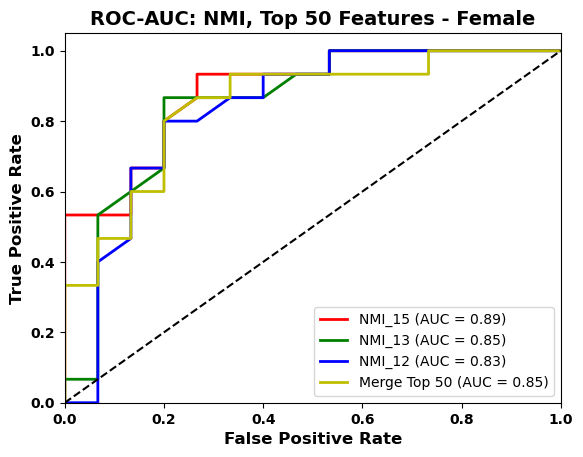

In [18]:
# First DataFrame
dataset1 = dff1.groupby('APPRDX').apply(lambda x: x.sample(15, random_state=1))
X1 = dataset1.iloc[:, 1:].values
y1 = dataset1.iloc[:, 0].values
classifier1 = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob1 = cross_val_predict(classifier1, X1, y1, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr1, tpr1, thresholds1 = roc_curve(y1, y_prob1[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc1 = auc(fpr1, tpr1)

# Second DataFrame
dataset2 = dff2.groupby('APPRDX').apply(lambda x: x.sample(15, random_state=1))
X2 = dataset2.iloc[:, 1:].values
y2 = dataset2.iloc[:, 0].values
classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini')
y_prob2 = cross_val_predict(classifier2, X2, y2, cv=10, method='predict_proba')
fpr2, tpr2, thresholds2 = roc_curve(y2, y_prob2[:, 1], pos_label=1)
roc_auc2 = auc(fpr2, tpr2)

# Third DataFrame
dataset3 = dff3.groupby('APPRDX').apply(lambda x: x.sample(15, random_state=1))
X3 = dataset3.iloc[:, 1:].values
y3 = dataset3.iloc[:, 0].values
classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini')
y_prob3 = cross_val_predict(classifier3, X3, y3, cv=10, method='predict_proba')
fpr3, tpr3, thresholds3 = roc_curve(y3, y_prob3[:, 1], pos_label=1)
roc_auc3 = auc(fpr3, tpr3)

# Fourth DataFrame
dataset4 = dff4.groupby('APPRDX').apply(lambda x: x.sample(15, random_state=1))
X4 = dataset4.iloc[:, 1:].values
y4 = dataset4.iloc[:, 0].values
classifier4 = RandomForestClassifier(n_estimators=100, criterion='gini')
y_prob4 = cross_val_predict(classifier4, X4, y4, cv=10, method='predict_proba')
fpr4, tpr4, thresholds4 = roc_curve(y4, y_prob4[:, 1], pos_label=1)
roc_auc4 = auc(fpr4, tpr4)


# Plot the ROC curves for all three dataframes in a single plot
plt.plot(fpr1, tpr1, color='r', lw=2, label='NMI_15 (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='NMI_13 (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='NMI_12 (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='y', lw=2, label='Merge Top 50 (AUC = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: NMI, Top 50 Features - Female', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and Pdff files
plt.savefig('ROC_AUC_NMI_TopFeat_withFeat_Female.svg')
plt.savefig('ROC_AUC_NMI_TopFeat_withFeat_Female.pdf')

# Show the plot
plt.show()

In [19]:
# First DataFrame
tn1, fp1, fn1, tp1 = confusion_matrix(y1, np.argmax(y_prob1, axis=1)).ravel()
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
balanced_accuracy1 = (sensitivity1 + specificity1) / 2

#Second DataFrame
tn2, fp2, fn2, tp2 = confusion_matrix(y2, np.argmax(y_prob2, axis=1)).ravel()
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)
balanced_accuracy2 = (sensitivity2 + specificity2) / 2

#Third DataFrame
tn3, fp3, fn3, tp3 = confusion_matrix(y3, np.argmax(y_prob3, axis=1)).ravel()
sensitivity3 = tp3 / (tp3 + fn3)
specificity3 = tn3 / (tn3 + fp3)
balanced_accuracy3 = (sensitivity3 + specificity3) / 2

#Fourth DataFrame
tn4, fp4, fn4, tp4 = confusion_matrix(y4, np.argmax(y_prob4, axis=1)).ravel()
sensitivity4 = tp4 / (tp4 + fn4)
specificity4 = tn4 / (tn4 + fp4)
balanced_accuracy4 = (sensitivity4 + specificity4) / 2


data = {
    'NMI_15': [sensitivity1, specificity1, balanced_accuracy1],
    'NMI_13': [sensitivity2, specificity2, balanced_accuracy2],
    'NMI_12': [sensitivity3, specificity3, balanced_accuracy3],
    'Merge_Top50': [sensitivity4, specificity4, balanced_accuracy4]
}
results_df = pd.DataFrame(data, index=['Sensitivity', 'Specificity', 'Balanced Accuracy'])

results_df.to_csv('Table_NMI_mergeTop50_withFeat_Female.csv')
results_df.head()

,NMI_15,NMI_13,NMI_12,Merge_Top50
Sensitivity,0.8,0.866667,0.800000,0.866667
Specificity,0.8,0.800000,0.733333,0.733333
Balanced Accuracy,0.8,0.833333,0.766667,0.800000
